In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
X_train = x_train_image.reshape(60000, 784).astype('float32')
X_test  = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
X_train_Normal = X_train/255
X_test_Normal = X_test/255

In [5]:
Y_train_Onehot =np_utils.to_categorical(y_train_label)
Y_test_Onehot = np_utils.to_categorical(y_test_label)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units = 256,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

In [9]:
model.add(Dense(units=10,
         kernel_initializer='normal',
         activation = 'softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [14]:
train_history = model.fit(x = X_train_Normal, y = Y_train_Onehot,
                          validation_split=0.2, epochs=10, batch_size = 32, verbose = 2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





 - 8s - loss: 0.2700 - acc: 0.9223 - val_loss: 0.1332 - val_acc: 0.9611
Epoch 2/10
 - 5s - loss: 0.1080 - acc: 0.9682 - val_loss: 0.1060 - val_acc: 0.9682
Epoch 3/10
 - 5s - loss: 0.0715 - acc: 0.9779 - val_loss: 0.0945 - val_acc: 0.9711
Epoch 4/10
 - 5s - loss: 0.0515 - acc: 0.9841 - val_loss: 0.0803 - val_acc: 0.9754
Epoch 5/10
 - 5s - loss: 0.0372 - acc: 0.9884 - val_loss: 0.0841 - val_acc: 0.9752
Epoch 6/10
 - 5s - loss: 0.0257 - acc: 0.9920 - val_loss: 0.0772 - val_acc: 0.9780
Epoch 7/10
 - 5s - loss: 0.0200 - acc: 0.9941 - val_loss: 0.0881 - val_acc: 0.9768
Epoch 8/10
 - 4s - loss: 0.0172 - acc: 0.9944 - val_loss: 0.0836 - val_acc: 0.9792
Epoch 9/10
 - 4s - loss: 0.0135 - acc: 0.9957 - val_loss: 0.0919 - val_acc: 0.9755
Epoch 10/10
 - 5s - loss: 0.0100 - acc: 0.9968 - val_loss: 0.0886 - val_acc: 0.9778


In [15]:
import matplotlib.pyplot as plt

In [16]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

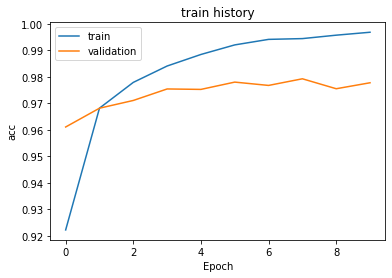

In [17]:
show_train_history(train_history, 'acc', 'val_acc')

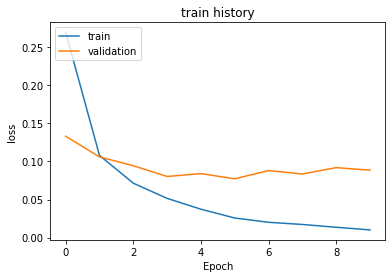

In [18]:
show_train_history(train_history, 'loss', 'val_loss')

In [19]:
scores = model.evaluate(X_test_Normal, Y_test_Onehot)
print()
print(scores)

10000/10000 [==============================] - 0s 32us/step

[0.08373178431620545, 0.9785]
